In [1]:
# Load data and Library

import os
import json
import numpy as np
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

datas = [
    'data/data_fold/data_0/dailydialog_train.json',
    'data/data_fold/data_0/dailydialog_valid.json',
    'data/data_fold/data_0/dailydialog_test.json',
]

# ConvECPE
datas = ['data/data_ConvECPE/ConvECPE_fold_0_train.json',
'data/data_ConvECPE/ConvECPE_fold_0_valid.json',
'data/data_ConvECPE/ConvECPE_fold_0_test.json',]
# data_label = ['-ConvECPE',]

# datas = [
#     'data/data_fold_test_IEMOCAP/data_0/data_0_test.json',
# ]

# datas = [
#     'ConvECPE/ConvECPE_train.json',
#     'ConvECPE/ConvECPE_valid.json',
#     'ConvECPE/ConvECPE_test.json',
# ]
# # Another folds
# fold_ = 1
# datas = [
#     f'data/data_fold/data_{fold_}/data_{fold_}_train.json',
#     f'data/data_fold/data_{fold_}/data_{fold_}_valid.json',
#     f'data/data_fold/data_{fold_}/data_{fold_}_test.json'
# ]


# # Entire data
# datas = [
#     'data/data_fold_test_IEMOCAP/data_0/data_0_train.json',
#     'data/data_fold_test_IEMOCAP/data_0/data_0_valid.json',
#     'data/data_fold_test_IEMOCAP/data_0/data_0_test.json'
# ]



/home/hjl8708/anaconda3/envs/prgmoe/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-06-14 11:37:38.644317: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
sum_dailog = 0
sum_utterance = 0
sum_pair = 0
sum_pair_after = 0

emotion_label_policy = {'happy': 0, 'sad': 1, 'neutral': 2, 'angry': 3, 'excited': 4, 'frustrated': 5} 
label_to_emotion_policy = ['happy', 'sad', 'neutral', 'angry', 'excited', 'frustrated']

# emotion_label_policy = {'angry': 0, 'anger': 0,
#     'disgust': 1,
#     'fear': 2,
#     'happy': 3, 'happines': 3, 'happiness': 3, 'excited': 3,
#     'sad': 4, 'sadness': 4, 'frustrated': 4,
#     'surprise': 5, 'surprised': 5, 
#     'neutral': 6}

# label_to_emotion_policy = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']


# emotion_label_policy = {'happy': 0, 'sad': 1, 'neutral': 2, 'angry': 3, 'excited': 4, 'frustrated': 5}
# label_to_emotion_policy = ['happy', 'sad', 'neutral', 'angry', 'excited', 'frustrated']

max_dialog = 0
min_dialog = float('inf')

dialog_lengths = []
utterance_emotions = []
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
utterance_lengths = []

for datafile in datas:
    with open(datafile, 'r') as f:
        json_data = json.load(f)
        print('대화 개수: ', len(json_data))
        sum_dailog += len(json_data)
        print('발화 개수: ', sum([len(json_data[d][0]) for d in json_data]))
        sum_utterance += sum([len(json_data[d][0]) for d in json_data])
        max_dialog = max(max_dialog, max([len(json_data[d][0]) for d in json_data]))
        min_dialog = min(min_dialog, min([len(json_data[d][0]) for d in json_data]))
        
        dialog_lengths.append([len(json_data[d][0]) for d in json_data])
        
        for d in json_data:
            for u in json_data[d][0]:
                if 'expanded emotion cause evidence' in u:
                    # u['expanded emotion cause evidence']에서 number만 남긴다
                    pair_num = [s for s in u['expanded emotion cause evidence'] if s!='b']
                    pair_back = [s for s in u['expanded emotion cause evidence'] if s=='b']
                    sum_pair += len(pair_num)
                    sum_pair_after += len(pair_back)
                    # print(u['expanded emotion cause evidence'])
                utterance_emotions.append(u['emotion'])
                ulen = len(tokenizer.encode(u['utterance'])[1:-1])
                utterance_lengths.append(ulen)
                if ulen==287:
                    print(u['utterance'])
        
        
print('전체 대화 개수: ', sum_dailog)
print('전체 발화 개수: ', sum_utterance)
print('전체 pair 개수: ', sum_pair)
print('전체 pair_back 개수: ', sum_pair_after)

# replace emotion string in utterance_emotions to emotion label in emotion_label_policy
for i, emotion in enumerate(utterance_emotions):
    utterance_emotions[i] = emotion_label_policy[emotion]

    
# replace emotion label to string in label_to_emotion_policy
emotion_appearance = [0 for _ in range(len(emotion_label_policy))]
for i, emotion in enumerate(utterance_emotions):
    utterance_emotions[i] = label_to_emotion_policy[emotion]    
    emotion_appearance[emotion] += 1

dict_emotion_appearance = {}
for i in range(len(label_to_emotion_policy)):
    dict_emotion_appearance[label_to_emotion_policy[i]] = emotion_appearance[i]
dict_emotion_appearance['total'] = sum(emotion_appearance)

for d in dict_emotion_appearance:
    print(d, ':', dict_emotion_appearance[d])

# 평균 발화 길이
print('평균 발화 길이: ', sum(utterance_lengths)/len(utterance_lengths))

# 평균 대화 길이
print('평균 대화 길이: ', sum([sum(dialog) for dialog in dialog_lengths])/len(dialog_lengths))

# pyplot으로 발화 길이 시각화


print(dict_emotion_appearance)


대화 개수:  96
발화 개수:  4613
대화 개수:  24
발화 개수:  1197
대화 개수:  31
발화 개수:  1623
전체 대화 개수:  151
전체 발화 개수:  7433
전체 pair 개수:  8924
전체 pair_back 개수:  549
happy : 648
sad : 1084
neutral : 1708
angry : 1103
excited : 1041
frustrated : 1849
total : 7433
평균 발화 길이:  17.8512040898695
평균 대화 길이:  2477.6666666666665
{'happy': 648, 'sad': 1084, 'neutral': 1708, 'angry': 1103, 'excited': 1041, 'frustrated': 1849, 'total': 7433}


In [7]:
7433/151

49.22516556291391

In [3]:
for datafile in datas:
    file_size = os.path.getsize(datafile)
    print(datafile, ': ', file_size, 'bytes')

data/data_fold/data_0/dailydialog_train.json :  3569807 bytes
data/data_fold/data_0/dailydialog_valid.json :  191861 bytes
data/data_fold/data_0/dailydialog_test.json :  972369 bytes


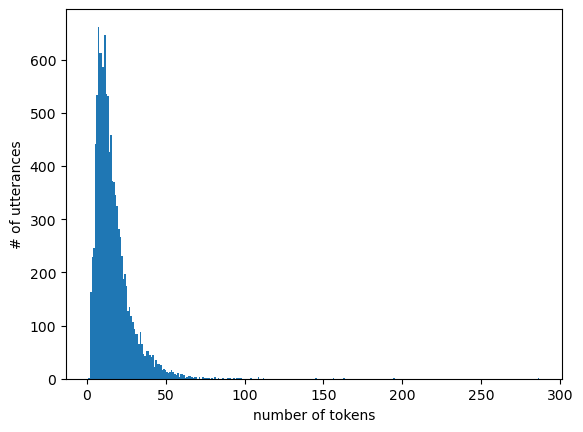

In [8]:
# Visualize utterance lengths distribution data in the array utterance_lengths in a bar chart 
plt.hist(utterance_lengths,  bins=290)
plt.xlabel('number of tokens')
plt.ylabel('# of utterances')

plt.show()

In [8]:
tmp_ = 0

for i in utterance_lengths:
    if i >= 75:
        tmp_ += 1
        print(i, end=" ")

print(f'\n개수: {tmp_}')

109 89 104 109 81 163 195 98 112 77 81 91 97 109 97 93 90 287 95 83 145 86 76 98 75 79 81 156 86 96 
개수: 30
